<a href="https://colab.research.google.com/github/nitesh1333/DS_Basic_MachineLearning/blob/master/Dtree_Rforest_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Descriptions

### Kidney Disease Dataset

Predicting Chronic Kidney Disease based on health records.

Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).

**Problem Statement :** Classify whether the patients have "Classification" column 'ckd' or 'notckd'. This means whether the patient has kidney disorder or not.

In [1]:
# Importing the dataset and libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
os.getcwd()

'/content'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
kidney_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/2_MachineLearning/DecisionTree and RandomFforest/Assignment/kidney_disease.csv')

In [6]:
kidney_df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


** There are 26 columns **

In [8]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Perform feature engineering on the columns to remove all the categorical columns and object datatype columns

** There are a lot of object data types. We need to convert them to numeric before any further processing **

In [9]:
kidney_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

** These columns have numerical values but have object dtype **

In [10]:
#These columns have \t? values

kidney_df.drop(kidney_df.index[[66,214,185, 133, 162]], inplace=True)

In [11]:
kidney_df[['pcv','wc','rc']] = kidney_df[['pcv','wc','rc']].apply(pd.to_numeric)

In [13]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              395 non-null    int64  
 1   age             386 non-null    float64
 2   bp              384 non-null    float64
 3   sg              349 non-null    float64
 4   al              350 non-null    float64
 5   su              347 non-null    float64
 6   rbc             246 non-null    object 
 7   pc              331 non-null    object 
 8   pcc             391 non-null    object 
 9   ba              391 non-null    object 
 10  bgr             351 non-null    float64
 11  bu              376 non-null    float64
 12  sc              378 non-null    float64
 13  sod             309 non-null    float64
 14  pot             308 non-null    float64
 15  hemo            344 non-null    float64
 16  pcv             325 non-null    float64
 17  wc              291 non-null    flo

In [16]:
kidney_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [28]:
## for each object column find the categorical feature
for (col, coldata) in kidney_df.iteritems():
  if kidney_df[col].dtype=='object':
    print("For Col: ",col,", Unique values: ", kidney_df[col].unique())

** These columns are categorical **

In [24]:
kidney_df[['htn','dm','cad','pe','ane']] = kidney_df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney_df['dm'] = kidney_df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney_df['cad'] = kidney_df['cad'].replace(to_replace='\tno',value=0)

kidney_df[['rbc','pc']] = kidney_df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney_df[['pcc','ba']] = kidney_df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

kidney_df[['appet']] = kidney_df[['appet']].replace(to_replace={'good':1,'poor':0})  #,'no':np.nan
kidney_df['classification'] = kidney_df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0})  #,'no':0.0
kidney_df.rename(columns={'classification':'class'},inplace=True)

In [25]:
kidney_df['pe'] = kidney_df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney_df['appet'] = kidney_df['appet'].replace(to_replace='no',value=0)

# Dropping the index column
kidney_df.drop('id',axis=1,inplace=True)

** Now we have converted all the object columns in float64 **

## Question: Remove missing values from the data frame

In [42]:
kidney_df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [33]:
kidney_df.drop_duplicates(inplace=True)

In [43]:
kidney_df.shape

(395, 22)

In [37]:
#majority of data in rbs, wc and rc are not available hence we can drop these and for rest we can take mean value to fill

kidney_df.drop(columns=['rbc','wc','rc'], inplace=True)

In [41]:
kidney_df.fillna(kidney_df.mean(), inplace=True)

## Question : Perform Descriptive Statistics on the dataset and come up with insights on shape, spread and central deviation 

In [45]:
kidney_df.describe()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,51.455959,76.432292,1.017407,1.008571,0.455331,0.226586,0.107417,0.056266,148.031339,57.479255,3.086640,137.597087,4.628247,12.534012,38.898462,0.368957,0.340967,0.086514,0.791878,0.190355,0.152284,0.620253
std,16.845351,13.500540,0.005397,1.269492,1.034994,0.383697,0.308461,0.229556,75.138023,49.416675,5.648511,9.230974,2.837424,2.728991,8.195215,0.481909,0.473432,0.280765,0.405964,0.392581,0.359296,0.485939
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.850000,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,80.000000,1.017407,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,44.000000,1.400000,137.597087,4.628247,12.534012,38.898462,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.455331,0.226586,0.000000,0.000000,149.015670,62.500000,3.086640,141.000000,4.800000,14.700000,44.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Question : Perform EDA and find any correlation

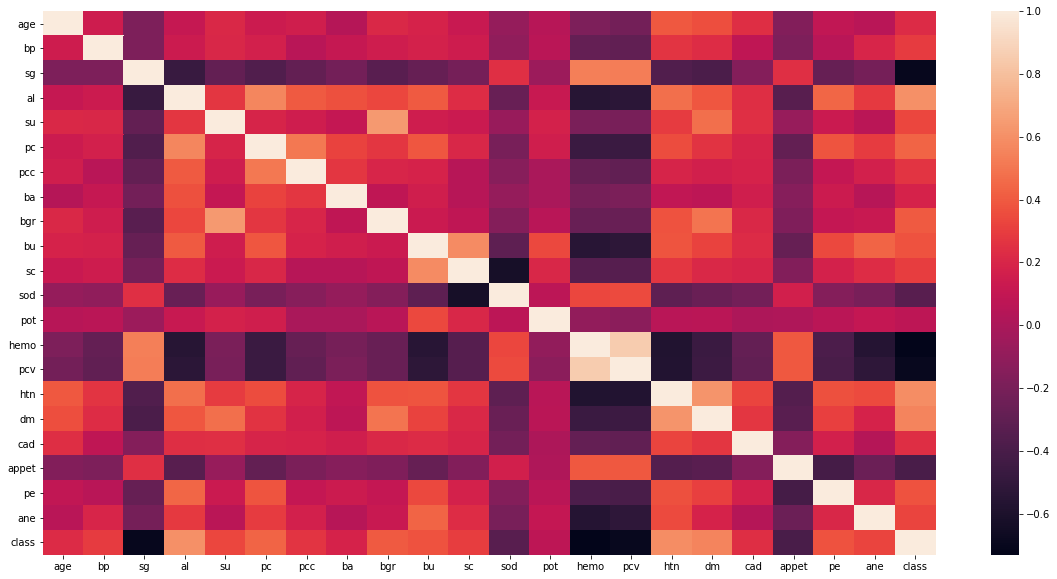

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(kidney_df.corr())

plt.show()

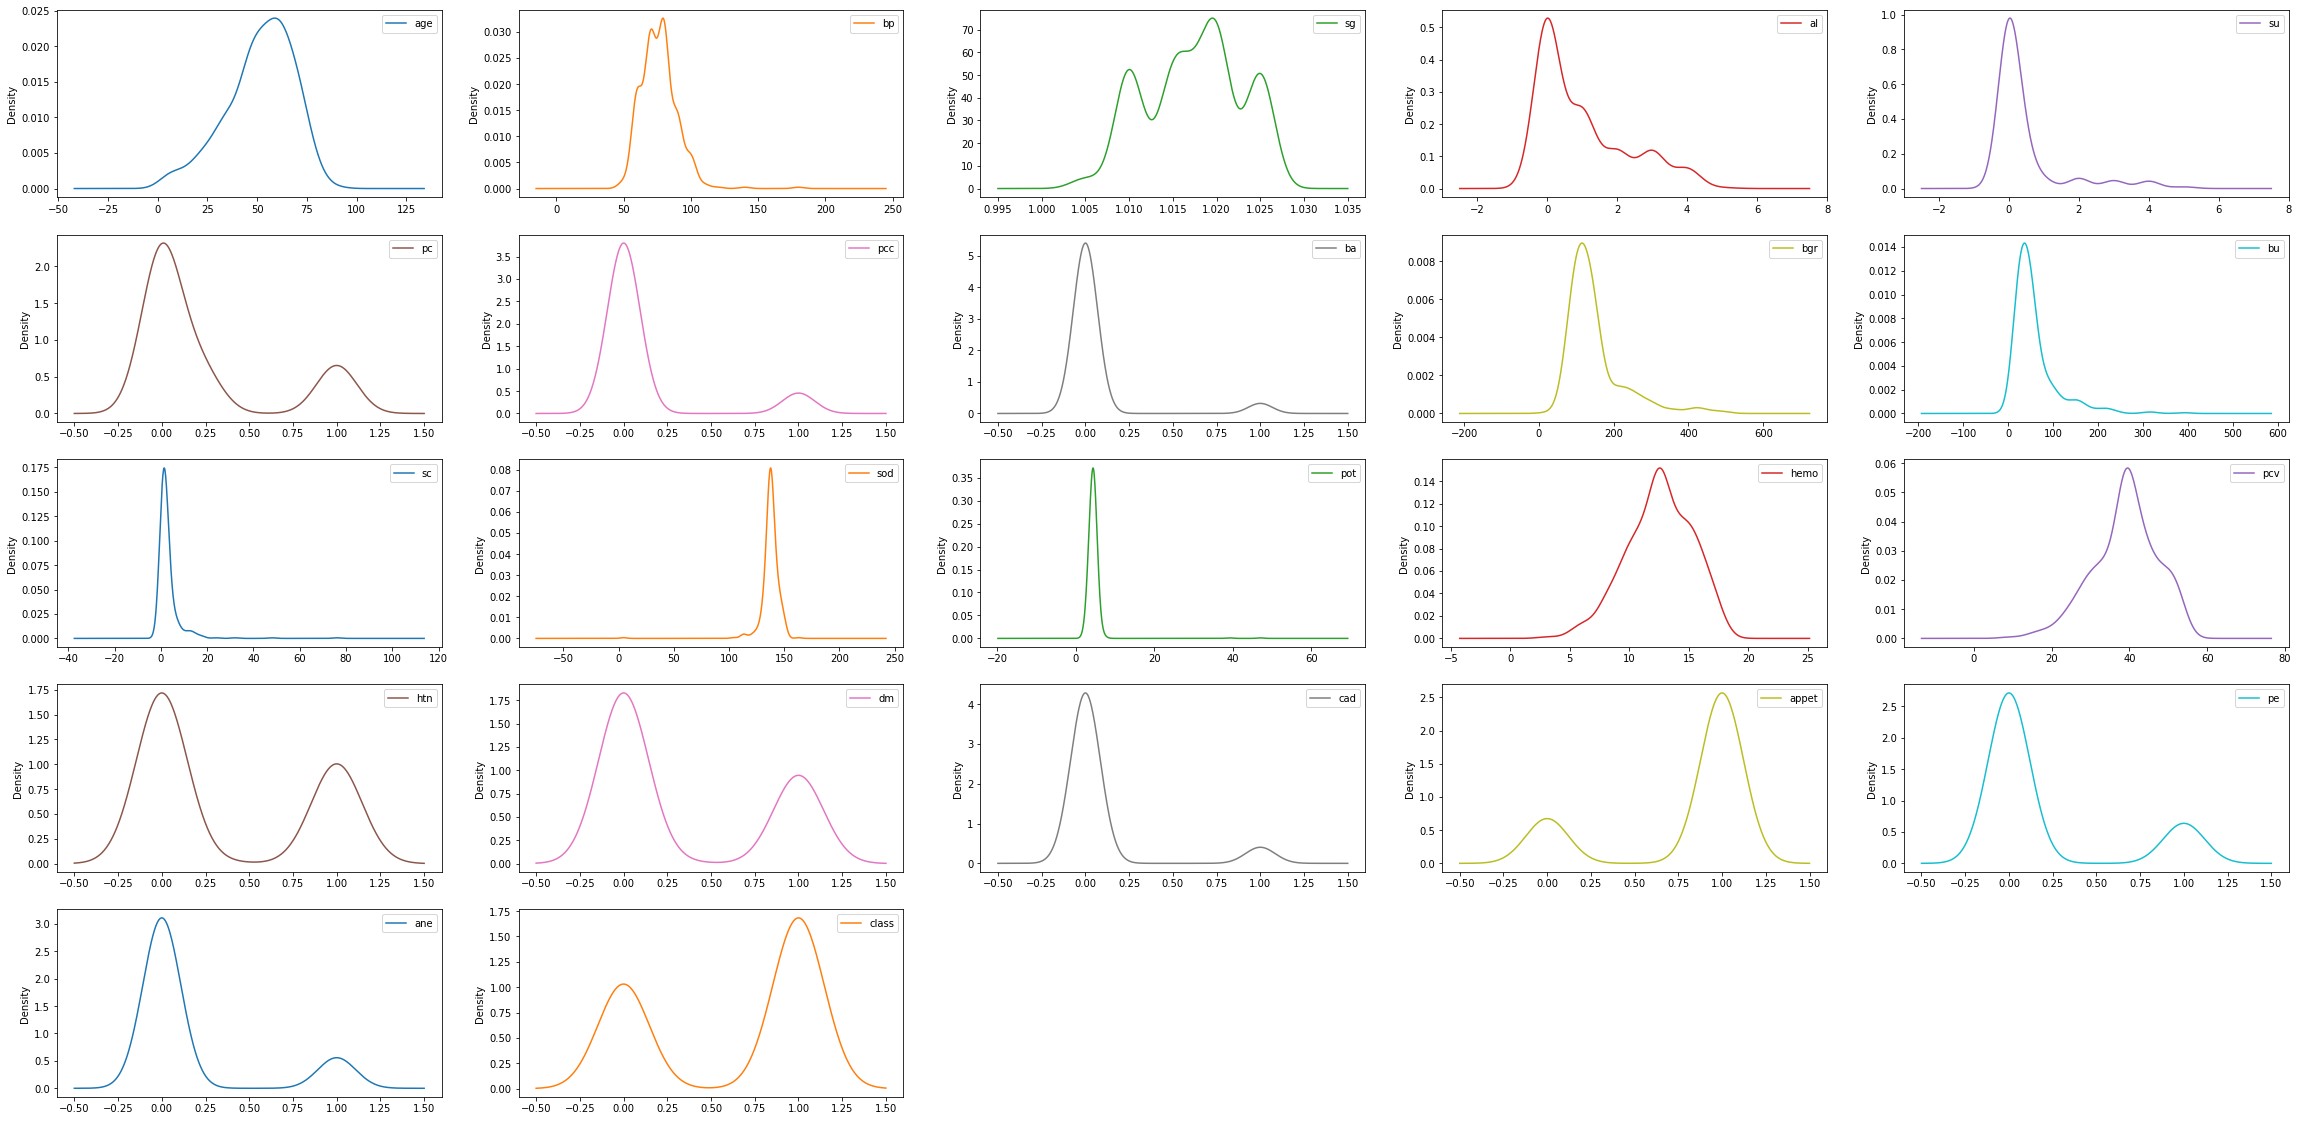

In [44]:
kidney_df.plot(kind='density', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize = (40,20))
plt.show()

## feature - target split and Train - test split   

In [57]:
Y = kidney_df['class'].values
X = kidney_df.drop(columns='class')

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

## Question: Perform classification using Decision Tree algorithm and explain the performance

In [62]:
from sklearn.tree import DecisionTreeClassifier
ds_tree_1 =  DecisionTreeClassifier(criterion='gini', random_state=42)
ds_tree_1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [63]:
ds_tree_1.fit(x_train, y_train)
y_pred = ds_tree_1.predict(x_test)


In [69]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## **Confusion Matrix**

Confusion Matrix is : 
 [[44  1]
 [ 5 69]]


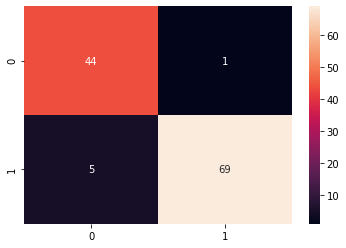

In [71]:
print("Confusion Matrix is : \n", confusion_matrix(y_test, y_pred=y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred=y_pred), annot=True, fmt='d')

Classification Report 

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        45
         1.0       0.99      0.93      0.96        74

    accuracy                           0.95       119
   macro avg       0.94      0.96      0.95       119
weighted avg       0.95      0.95      0.95       119



## Question: Perform classification using Random Forest and explain the metrics

In [74]:
from sklearn.ensemble import RandomForestClassifier
randTree = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)

In [75]:
randTree.fit(x_train, y_train)
y_pred1 = randTree.predict(x_test)


In [76]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        45
         1.0       1.00      0.99      0.99        74

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



In [77]:
print("Confusion Matrics: \n", confusion_matrix(y_test, y_pred))

Confusion Matrics: 
 [[44  1]
 [ 5 69]]


In [81]:
print(" Accuracy in Dession Tree Model : \n",accuracy_score(y_test, y_pred),"\n\n")

print(" Accuracy in Random Forest Model : \n",accuracy_score(y_test, y_pred1),"\n")

 Accuracy in Dession Tree Model : 
 0.9495798319327731 


 Accuracy in Random Forest Model : 
 0.9915966386554622 

